# Bab 10: Pengantar Jaringan Neural Buatan dengan Keras

Selamat datang di Bab 10 dari "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"! Pada bab ini, kita akan menyelami dunia Jaringan Neural Buatan (Artificial Neural Networks/ANNs), inti dari Deep Learning. Kita akan memahami bagaimana ANN terinspirasi dari neuron biologis, menjelajahi arsitektur awal, dan mempelajari Multilayer Perceptrons (MLPs) yang banyak digunakan saat ini. Kemudian, kita akan mengimplementasikan jaringan neural menggunakan API Keras yang populer dan mudah digunakan.

## 1. Dari Neuron Biologis ke Neuron Buatan

Jaringan Neural Buatan (ANN) adalah model Machine Learning yang terinspirasi oleh jaringan neuron biologis di otak kita. Meskipun terinspirasi dari biologi, ANN telah berkembang jauh dan tidak selalu meniru persis cara kerja otak biologis.

### 1.1. Neuron Biologis

Neuron biologis adalah sel-sel unik yang ditemukan di otak hewan.
* **Struktur:** Terdiri dari badan sel (soma) yang berisi nukleus, banyak ekstensi bercabang yang disebut dendrit, dan satu ekstensi yang sangat panjang yang disebut akson. Akson bercabang menjadi telodendria, dengan ujung-ujungnya memiliki struktur kecil yang disebut terminal sinaptik (atau sinapsis) yang terhubung ke dendrit atau badan sel neuron lain.
* **Fungsi:** Neuron biologis menghasilkan impuls listrik pendek yang disebut potensial aksi (sinyal) yang bergerak di sepanjang akson dan membuat sinapsis melepaskan sinyal kimia yang disebut neurotransmiter. Jika neuron menerima cukup neurotransmiter dalam beberapa milidetik, ia akan "menembakkan" impuls listriknya sendiri.

Meskipun neuron individual tampak sederhana, mereka terorganisir dalam jaringan luas miliaran neuron, dengan setiap neuron terhubung ke ribuan neuron lainnya. Komputasi yang sangat kompleks dapat dilakukan oleh jaringan neuron yang relatif sederhana ini.

### 1.2. Komputasi Logis dengan Neuron

Warren McCulloch dan Walter Pitts pada tahun 1943 mengusulkan model neuron biologis yang sangat sederhana, yang kemudian dikenal sebagai *neuron buatan*. Neuron buatan ini memiliki satu atau lebih input biner (on/off) dan satu output biner. Neuron buatan mengaktifkan outputnya ketika lebih dari sejumlah tertentu inputnya aktif.

Model sederhana ini menunjukkan bahwa dimungkinkan untuk membangun jaringan neuron buatan yang dapat melakukan operasi logika apa pun.

**Contoh Jaringan Neural Buatan untuk Komputasi Logis:**
Misalkan sebuah neuron diaktifkan jika setidaknya dua inputnya aktif.

* **Fungsi Identitas:** Jika neuron A aktif, neuron C juga aktif (menerima dua sinyal input dari A). Jika neuron A nonaktif, C juga nonaktif.
* **Logika AND:** Neuron C hanya aktif ketika kedua neuron A dan B aktif (satu sinyal input tidak cukup).
* **Logika OR:** Neuron C aktif jika neuron A atau B aktif (atau keduanya).
* **Logika NOT:** Jika koneksi input dapat menghambat aktivitas neuron, neuron C aktif hanya jika neuron A aktif dan neuron B nonaktif. Jika neuron A selalu aktif, C aktif ketika B nonaktif, dan sebaliknya.


### 1.3. Perceptron

Perceptron adalah salah satu arsitektur ANN paling sederhana, ditemukan pada tahun 1957 oleh Frank Rosenblatt. Ini didasarkan pada neuron buatan yang sedikit berbeda yang disebut *threshold logic unit* (TLU), atau kadang-kadang *linear threshold unit* (LTU).

* **Cara Kerja TLU:**
    * Input dan output adalah angka (bukan nilai biner on/off).
    * Setiap koneksi input memiliki bobot yang terkait dengannya.
    * TLU menghitung jumlah bobot dari inputnya ($z = w_1x_1 + w_2x_2 + \dots + w_nx_n = \mathbf{x}^\mathsf{T}\mathbf{w}$).
    * Kemudian menerapkan fungsi langkah ke jumlah tersebut dan menghasilkan outputnya: $h_\mathbf{w}(\mathbf{x}) = \text{step}(z)$.

* **Fungsi Langkah Umum:** Fungsi langkah Heaviside adalah yang paling umum digunakan (Lihat Persamaan 10-1 pada halaman 315 buku).
* **Klasifikasi Biner:** Satu TLU dapat digunakan untuk klasifikasi biner linear sederhana.
* **Arsitektur Perceptron:** Perceptron terdiri dari satu lapisan TLU, di mana setiap TLU terhubung ke semua input. Lapisan ini disebut *fully connected layer* atau *dense layer*. Input diberikan ke *input neurons* (neuron passthrough), dan biasanya ada *bias neuron* tambahan yang selalu menghasilkan 1.

**Komputasi Output Lapisan Tersambung Penuh:**
Output dari satu lapisan neuron buatan untuk beberapa instance sekaligus dapat dihitung secara efisien menggunakan bentuk vektor (Lihat Persamaan 10-2 pada halaman 316 buku).

$\mathbf{h}_{\mathbf{W},b}(\mathbf{X}) = \phi(\mathbf{XW} + b)$

* $\mathbf{X}$: matriks fitur input (satu baris per instance, satu kolom per fitur).
* $\mathbf{W}$: matriks bobot (satu baris per neuron input, satu kolom per neuron buatan di lapisan).
* $b$: vektor bias (satu bias per neuron buatan).
* $\phi$: fungsi aktivasi (fungsi langkah untuk TLU).

**Algoritma Pelatihan Perceptron:**
Algoritma ini diusulkan oleh Rosenblatt, terinspirasi oleh aturan Hebb (Hebb's rule) yang menyatakan bahwa koneksi antar neuron menguat jika mereka sering aktif bersamaan. Perceptron dilatih dengan memberi satu instance pelatihan pada satu waktu, membuat prediksi, dan memperkuat bobot koneksi dari input yang akan berkontribusi pada prediksi yang benar (Lihat Persamaan 10-3 pada halaman 317 buku).

$w_{i,j}^{\text{next step}} = w_{i,j} + \eta (\hat{y}_j - y_j)x_i$

* $w_{i,j}$: bobot koneksi antara neuron input $i$ dan neuron output $j$.
* $x_i$: nilai input $i$ dari instance pelatihan saat ini.
* $\hat{y}_j$: output neuron output $j$ untuk instance pelatihan saat ini.
* $y_j$: target output neuron output $j$ untuk instance pelatihan saat ini.
* $\eta$: tingkat pembelajaran.

**Keterbatasan Perceptron:**
Batas keputusan setiap neuron output bersifat linear, sehingga Perceptron tidak mampu mempelajari pola kompleks (mirip dengan klasifikasi Regresi Logistik). Namun, jika instance pelatihan dapat dipisahkan secara linear, algoritma ini akan konvergen ke suatu solusi (Perceptron convergence theorem).

**Implementasi Perceptron dengan Scikit-Learn:**


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)  # Iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[0]


Perceptron Scikit-Learn setara dengan `SGDClassifier` dengan `loss="perceptron"`, `learning_rate="constant"`, `eta0=1` (tingkat pembelajaran), dan `penalty=None` (tanpa regularisasi). Perceptron tidak mengeluarkan probabilitas kelas, melainkan membuat prediksi berdasarkan ambang batas keras.

## 2. Multilayer Perceptron (MLP) dan Backpropagation

Keterbatasan Perceptron dapat diatasi dengan menumpuk beberapa Perceptron. Jaringan neural buatan yang dihasilkan disebut *Multilayer Perceptron* (MLP).

* **Arsitektur MLP:** Terdiri dari:
    * Satu lapisan input (passthrough).
    * Satu atau lebih lapisan TLU, disebut *hidden layers* (lapisan tersembunyi).
    * Satu lapisan TLU terakhir yang disebut *output layer* (lapisan output).
    * Lapisan yang dekat dengan input disebut *lower layers*, dan yang dekat dengan output disebut *upper layers*.
    * Setiap lapisan kecuali lapisan output menyertakan neuron bias dan terhubung penuh ke lapisan berikutnya.

* **Jaringan Neural Feedforward (FNN):** Sinyal hanya mengalir dalam satu arah (dari input ke output).
* **Deep Neural Network (DNN):** ANN yang memiliki tumpukan lapisan tersembunyi yang dalam. Studi DNN disebut *Deep Learning*.

**Algoritma Backpropagation:**
Pada tahun 1986, David Rumelhart, Geoffrey Hinton, dan Ronald Williams menerbitkan makalah yang memperkenalkan algoritma *backpropagation* untuk melatih MLP, yang masih digunakan hingga saat ini. Ini adalah Gradient Descent yang menggunakan teknik efisien untuk menghitung gradien secara otomatis (*automatic differentiation* atau *autodiff*).

**Langkah-langkah Backpropagation:**
1.  Menangani satu *mini-batch* pada satu waktu, melewati set pelatihan penuh beberapa kali (setiap pass disebut *epoch*).
2.  Setiap mini-batch dilewatkan ke lapisan input, kemudian ke lapisan tersembunyi pertama, dan seterusnya hingga mencapai lapisan output (ini disebut *forward pass*). Semua hasil perantara disimpan untuk *backward pass* karena dibutuhkan untuk pass mundur.
3.  Algoritma mengukur error output jaringan (menggunakan fungsi loss).
4.  Menghitung seberapa besar setiap koneksi output berkontribusi pada error (menggunakan *chain rule*).
5.  Mengukur seberapa besar kontribusi error ini berasal dari setiap koneksi di lapisan bawah, bekerja mundur hingga mencapai lapisan input.
6.  Melakukan langkah Gradient Descent untuk menyesuaikan semua bobot koneksi dalam jaringan, menggunakan gradien error yang baru dihitung.

**Penting:** Bobot koneksi lapisan tersembunyi harus diinisialisasi secara acak untuk memecah simetri, jika tidak, pelatihan akan gagal.

**Fungsi Aktivasi:**
Agar algoritma backpropagation berfungsi dengan baik, fungsi langkah diganti dengan fungsi logistik (sigmoid) $\sigma(z) = 1 / (1 + \text{exp}(-z))$. Fungsi langkah memiliki segmen datar tanpa gradien, sedangkan fungsi logistik memiliki turunan nonzero yang terdefinisi dengan baik di mana-mana.

Fungsi aktivasi populer lainnya:
* **Fungsi Tangen Hiperbolik (tanh):** $\text{tanh}(z) = 2\sigma(2z) - 1$. Berbentuk S, kontinu, dan dapat diturunkan. Output berkisar dari -1 hingga 1.
* **Fungsi Rectified Linear Unit (ReLU):** $\text{ReLU}(z) = \text{max}(0, z)$. Kontinu tetapi tidak dapat diturunkan pada $z=0$. Cepat dihitung dan telah menjadi default.

Fungsi aktivasi diperlukan untuk memperkenalkan non-linearitas antar lapisan. Jika hanya ada transformasi linear, tumpukan lapisan yang dalam setara dengan satu lapisan, membatasi kemampuan untuk memecahkan masalah kompleks.


### 2.1. MLP untuk Regresi

MLP dapat digunakan untuk tugas regresi.
* **Output Neuron:** Satu neuron output untuk memprediksi satu nilai (misalnya, harga rumah). Untuk regresi multivariat, satu neuron output per dimensi output.
* **Fungsi Aktivasi Output:** Umumnya tidak menggunakan fungsi aktivasi untuk neuron output agar dapat menghasilkan nilai dalam rentang apa pun. Jika perlu output positif, gunakan ReLU atau softplus. Jika output dalam rentang tertentu, gunakan fungsi logistik atau tangen hiperbolik lalu skalakan label ke rentang yang sesuai.
* **Fungsi Loss:** Biasanya *mean squared error* (MSE). Jika banyak outlier, *mean absolute error* (MAE) atau *Huber loss* dapat digunakan.

**Arsitektur MLP Regresi Umum:** (Lihat Tabel 10-1 pada halaman 323 buku).

### 2.2. MLP untuk Klasifikasi

MLP juga digunakan untuk tugas klasifikasi.
* **Klasifikasi Biner:** Satu neuron output dengan fungsi aktivasi logistik. Outputnya adalah probabilitas kelas positif (antara 0 dan 1).
* **Klasifikasi Biner Multilabel:** Satu neuron output per label biner positif, masing-masing dengan fungsi aktivasi logistik.
* **Klasifikasi Multiclass:** Satu neuron output per kelas (tiga atau lebih kelas eksklusif), menggunakan fungsi aktivasi softmax untuk seluruh lapisan output. Output probabilitas akan berjumlah 1.
* **Fungsi Loss:** Umumnya *cross-entropy loss* (juga disebut *log loss*).

**Arsitektur MLP Klasifikasi Umum:** (Lihat Tabel 10-2 pada halaman 325 buku).

## 3. Mengimplementasikan MLP dengan Keras

Keras adalah API Deep Learning tingkat tinggi yang memungkinkan Anda membangun, melatih, mengevaluasi, dan menjalankan semua jenis jaringan neural dengan mudah.

### 3.1. Menginstal TensorFlow 2

Pastikan Anda telah menginstal TensorFlow 2.


In [3]:
pip install -U tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 w

In [4]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.19.0
3.8.0


### 3.2. Membangun Pengklasifikasi Gambar Menggunakan Sequential API

Kita akan menggunakan dataset Fashion MNIST, yang mirip dengan MNIST tetapi berisi gambar item fesyen, menjadikannya lebih menantang.

**Memuat Dataset Menggunakan Keras:**


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape)
print(X_train_full.dtype)

# Buat validation set dan skala fitur input (pixel intensities) ke rentang 0-1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(class_names[y_train[0]])

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
uint8
Coat


**Membuat Model Menggunakan Sequential API:**

Sequential API adalah jenis model Keras paling sederhana, terdiri dari tumpukan lapisan tunggal yang terhubung secara berurutan.


In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


* `Sequential` model: Tumpukan lapisan berurutan.
* `Flatten` layer: Mengonversi setiap gambar input menjadi array 1D. Tidak memiliki parameter, hanya untuk pra-pemrosesan. `input_shape` harus ditentukan pada lapisan pertama (tanpa ukuran batch).
* `Dense` hidden layer: Lapisan tersembunyi dengan neuron (misalnya, 300 atau 100). Menggunakan fungsi aktivasi (misalnya, ReLU). Mengelola matriks bobot dan vektor biasnya sendiri.
* `Dense` output layer: Lapisan output dengan neuron sejumlah kelas (misalnya, 10). Menggunakan fungsi aktivasi softmax untuk kelas eksklusif.

**Ringkasan Model (`model.summary()`):**
Metode `summary()` menampilkan semua lapisan model, nama, bentuk output, dan jumlah parameternya.

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

**Mengakses Parameter Lapisan:**
Semua parameter lapisan dapat diakses menggunakan metode `get_weights()` dan `set_weights()`. Untuk lapisan `Dense`, ini termasuk bobot koneksi dan istilah bias. Bobot koneksi diinisialisasi secara acak (penting untuk memecah simetri), dan bias diinisialisasi ke nol.

In [8]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


### 3.3. Mengompilasi Model

Setelah model dibuat, Anda harus memanggil metode `compile()` untuk menentukan fungsi loss dan optimizer yang akan digunakan. Secara opsional, Anda dapat menentukan daftar metrik tambahan yang akan dihitung selama pelatihan dan evaluasi.

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

* `loss="sparse_categorical_crossentropy"`: Digunakan karena kita memiliki label sparse (indeks kelas), dan kelasnya eksklusif. Gunakan `categorical_crossentropy` untuk one-hot vector, dan `binary_crossentropy` untuk klasifikasi biner.
* `optimizer="sgd"`: Melatih model menggunakan *Stochastic Gradient Descent* sederhana. Penting untuk menyetel *learning rate* optimizer SGD (`keras.optimizers.SGD(lr=???)`).
* `metrics=["accuracy"]`: Berguna untuk mengukur akurasi selama pelatihan dan evaluasi.

### 3.4. Melatih dan Mengevaluasi Model

Model siap dilatih dengan memanggil metode `fit()`.

In [10]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6892 - loss: 0.9773 - val_accuracy: 0.8292 - val_loss: 0.5137
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8246 - loss: 0.5073 - val_accuracy: 0.8494 - val_loss: 0.4431
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.8433 - loss: 0.4483 - val_accuracy: 0.8520 - val_loss: 0.4248
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8496 - loss: 0.4222 - val_accuracy: 0.8538 - val_loss: 0.4241
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8611 - loss: 0.4004 - val_accuracy: 0.8736 - val_loss: 0.3811
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8663 - loss: 0.3805 - val_accuracy: 0.8728 - val_loss: 0.3787
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8698 - loss: 0.3699 - val_accuracy: 0.8738 - val_loss: 0.3680
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8751 - loss: 0.35

* `fit()`: Menerima fitur input (`X_train`) dan kelas target (`y_train`), serta jumlah epoch untuk dilatih.
* `validation_data`: Opsional, digunakan untuk mengukur loss dan metrik tambahan di set validasi pada akhir setiap epoch. Jika performa pada training set jauh lebih baik daripada validation set, model kemungkinan *overfitting*.

Objek `History` yang dikembalikan oleh `fit()` berisi parameter pelatihan, daftar epoch, dan dictionary (`history.history`) yang berisi loss dan metrik tambahan yang diukur pada training set dan validation set.

**Kurva Pembelajaran:**


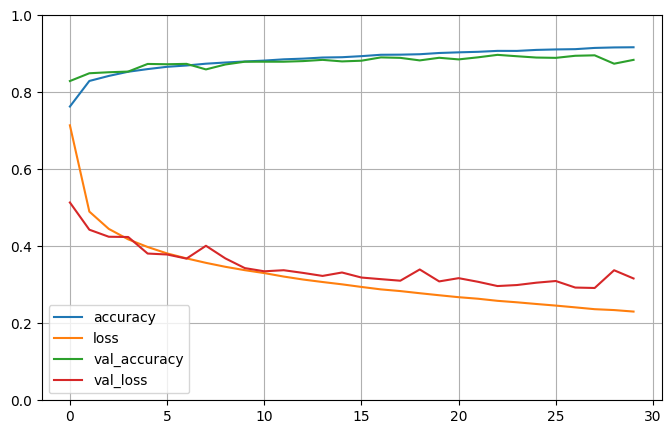

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### 3.5. Menggunakan Model untuk Membuat Prediksi

Metode `predict()` model dapat digunakan untuk membuat prediksi pada instance baru.

In [13]:
X_new = X_test[:3]  # pretend these are new instances
y_proba = model.predict(X_new)
print(y_proba.round(2))

y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)
print(y_pred)
print(np.array(class_names)[y_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


* `predict()`: Mengembalikan matriks dengan satu baris per instance dan satu kolom per kelas, berisi probabilitas estimasi untuk setiap kelas.
* `predict_classes()`: Mengembalikan kelas dengan probabilitas estimasi tertinggi.

## 4. Membangun MLP Regresi Menggunakan Sequential API

Menggunakan Sequential API untuk membangun, melatih, mengevaluasi, dan menggunakan MLP regresi mirip dengan klasifikasi.

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4108 - val_loss: 0.8245
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5319 - val_loss: 1.7251
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6871 - val_loss: 13.9179
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7682 - val_loss: 112.5257
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: nan - val_loss: nan
Epoch 13/20
363/363 ━

* Lapisan output: Satu neuron tanpa fungsi aktivasi (karena kita memprediksi satu nilai).
* Fungsi loss: `mean_squared_error`.

## 5. Membangun Model Kompleks Menggunakan Functional API

Untuk jaringan neural non-sequential atau dengan banyak input/output, Keras menawarkan Functional API.

### 5.1. Wide & Deep Neural Network

Arsitektur ini menghubungkan sebagian atau seluruh input langsung ke lapisan output. Ini memungkinkan jaringan neural mempelajari pola yang dalam (melalui jalur dalam) dan aturan sederhana (melalui jalur pendek).

In [15]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss="mse", optimizer="sgd")
# Latih, evaluasi, dan gunakan model seperti biasa
# history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
# mse_test = model.evaluate(X_test, y_test)
# y_pred = model.predict(X_new)

* `Input` object: Spesifikasi jenis input yang akan diterima model (bentuk dan dtype).
* Lapisan dipanggil seperti fungsi, meneruskan output lapisan sebelumnya sebagai input.
* `Concatenate` layer: Untuk menggabungkan output dari lapisan yang berbeda.
* `Model` class: Untuk membuat model, tentukan input dan outputnya.

### 5.2. Model dengan Banyak Input

Jika Anda ingin mengirim subset fitur melalui jalur lebar dan subset berbeda melalui jalur dalam, gunakan banyak input.

In [25]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# Siapkan data untuk banyak input
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

# Latih model dengan banyak input
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 3.8129 - val_loss: 1.1949
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.0296 - val_loss: 0.7472
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7211 - val_loss: 0.6434
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6353 - val_loss: 0.5947
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5925 - val_loss: 0.5658
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5574 - val_loss: 0.5447
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5206 - val_loss: 0.5283
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5240 - val_loss: 0.5175
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5060 - val_loss: 0.5061
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5082 - val_loss: 0.5016
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4805 - val_loss: 0.4879
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

### 5.3. Model dengan Banyak Output

Banyak kasus penggunaan memerlukan banyak output (misalnya, klasifikasi dan lokalisasi objek, tugas independen, atau regularisasi).

In [26]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

# Latih model dengan banyak output (label harus disediakan untuk setiap output)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - aux_output_loss: 2.6092 - loss: 1.3948 - main_output_loss: 1.2599 - val_aux_output_loss: 0.8965 - val_loss: 0.5711 - val_main_output_loss: 0.5348
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - aux_output_loss: 0.8705 - loss: 0.4995 - main_output_loss: 0.4582 - val_aux_output_loss: 0.7911 - val_loss: 0.6399 - val_main_output_loss: 0.6229
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - aux_output_loss: 0.7564 - loss: 0.4961 - main_output_loss: 0.4672 - val_aux_output_loss: 0.7854 - val_loss: 0.5012 - val_main_output_loss: 0.4695
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - aux_output_loss: 0.7573 - loss: 0.4973 - main_output_loss: 0.4685 - val_aux_output_loss: 0.7068 - val_loss: 0.4601 - val_main_output_loss: 0.4327
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - aux_output_loss: 0.6891 - loss: 0.4628 - main_output_loss: 0.4377 - val_aux_output_loss: 0.6604 - val_loss: 0.4479 - val_main_output_loss: 0.4242


* Setiap output membutuhkan fungsi loss sendiri (dapat berupa daftar loss).
* Bobot loss dapat diatur (`loss_weights`).
* Saat melatih model, label harus disediakan untuk setiap output.

## 6. Menggunakan Subclassing API untuk Membangun Model Dinamis

Jika Anda lebih suka gaya pemrograman imperatif atau model Anda melibatkan loop, bentuk yang bervariasi, percabangan kondisional, dan perilaku dinamis lainnya, Subclassing API adalah pilihan yang tepat.

In [37]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
# Latih, evaluasi, dan gunakan model seperti biasa

* Subclass `keras.Model`.
* Buat lapisan yang diperlukan dalam konstruktor.
* Gunakan lapisan tersebut untuk melakukan komputasi dalam metode `call()`.
* Kelebihan: Fleksibilitas tinggi.
* Kekurangan: Arsitektur tersembunyi, sulit disimpan/dikloning, sulit diinspeksi.

## 7. Menyimpan dan Memulihkan Model

Sangat mudah untuk menyimpan model Keras yang telah dilatih menggunakan Sequential API atau Functional API.

In [43]:
# --- Bagian untuk melatih dan menyimpan (seperti yang Anda miliki sebelumnya) ---
# Data dummy untuk kompilasi dan penyimpanan
X_train_A_dummy = np.random.rand(100, 5)
X_train_B_dummy = np.random.rand(100, 6)
y_train_dummy = np.random.rand(100)

# Buat instance model
model = WideAndDeepModel()

# Build model secara eksplisit atau dengan memanggilnya sekali
# Ini penting agar model tahu bentuk input dan membuat bobotnya
model.build(input_shape=[(None, 5), (None, 6)]) # Contoh input_shape: (batch_size, feature_dim)
# Atau Anda bisa memanggilnya dengan data dummy:
# _ = model([X_train_A_dummy, X_train_B_dummy])


# Compile model (menggunakan learning_rate=1e-3)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# Latih model dummy agar ada bobot yang tersimpan
model.fit([X_train_A_dummy, X_train_B_dummy], [y_train_dummy, y_train_dummy], epochs=1)

# GANTI: Simpan hanya bobot model, bukan seluruh model
model.save_weights("my_keras_model.weights.h5")

print("Bobot model berhasil disimpan!")

# --- Bagian untuk memuat model ---
# KETIKA MEMUAT MODEL DENGAN SUBCLASSING API:
# 1. Buat instance model baru dengan arsitektur yang sama
loaded_model = WideAndDeepModel()

# 2. Build model baru agar lapisannya dibuat dan siap menerima bobot
# Penting: Bentuk input harus cocok dengan yang digunakan saat menyimpan bobot.
loaded_model.build(input_shape=[(None, 5), (None, 6)])

# 3. Compile model baru (opsional, tergantung kebutuhan Anda)
# Jika Anda ingin melanjutkan pelatihan, compile diperlukan.
loaded_model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))


# 4. Muat bobot ke instance model yang baru
loaded_model.load_weights("my_keras_model.weights.h5")

print("Model (arsitektur baru) dan bobot berhasil dimuat!")

# Sekarang Anda bisa menggunakan loaded_model
# Misalnya, untuk membuat prediksi:
# X_new_A_dummy = np.random.rand(2, 5)
# X_new_B_dummy = np.random.rand(2, 6)
# predictions = loaded_model([X_new_A_dummy, X_new_B_dummy])
# print(predictions)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'wide_and_deep_model_9', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.3989 - mse_loss: 0.6851
Bobot model berhasil disimpan!
Model (arsitektur baru) dan bobot berhasil dimuat!


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'wide_and_deep_model_10', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


* Keras menggunakan format HDF5 untuk menyimpan arsitektur model dan nilai semua parameternya, serta optimizer.
* Untuk model Subclassing API, gunakan `save_weights()` dan `load_weights()` untuk menyimpan dan memulihkan parameter model.

## 8. Menggunakan Callbacks

Metode `fit()` menerima argumen `callbacks` yang memungkinkan Anda menentukan daftar objek yang akan dipanggil Keras pada awal/akhir pelatihan, awal/akhir setiap epoch, dan bahkan sebelum/sesudah memproses setiap batch.

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.weights.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = loaded_model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

* **`ModelCheckpoint`:** Menyimpan checkpoint model secara berkala selama pelatihan (default: akhir setiap epoch). Dapat diatur untuk menyimpan model terbaik saja (`save_best_only=True`).
* **`EarlyStopping`:** Menginterupsi pelatihan ketika tidak ada kemajuan pada validation set selama sejumlah epoch (didefinisikan oleh argumen `patience`). Secara opsional dapat mengembalikan model terbaik (`restore_best_weights=True`).


* **Custom Callbacks:** Anda dapat menulis callback kustom Anda sendiri dengan membuat subclass `keras.callbacks.Callback` dan mengimplementasikan metode yang relevan (misalnya, `on_epoch_end()`).

## 9. Menggunakan TensorBoard untuk Visualisasi

TensorBoard adalah alat visualisasi interaktif yang hebat untuk melihat kurva pembelajaran selama pelatihan, membandingkan kurva pembelajaran antar beberapa run, memvisualisasikan grafik komputasi, menganalisis statistik pelatihan, dan banyak lagi.

* **Mengeluarkan Data:** Ubah program Anda untuk menghasilkan data yang ingin Anda visualisasikan ke file log biner khusus yang disebut *event files*. Setiap record data biner disebut *summary*.
* **Callback `TensorBoard()`:** Keras menyediakan callback `TensorBoard()` yang mudah digunakan.


In [22]:
import os
import time

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

# run_logdir = get_run_logdir()
# tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
# history = model.fit(X_train, y_train, epochs=30,
#                     validation_data=(X_valid, y_valid),
#                     callbacks=[tensorboard_cb])

* **Menjalankan Server TensorBoard:** Dari terminal Anda:

    ```bash
    tensorboard --logdir=./my_logs --port=6006
    ```

    Atau langsung di Jupyter:

    ```python
    # %load_ext tensorboard
    # %tensorboard --logdir=./my_logs --port=6006
    ```


## 10. Fine-Tuning Hyperparameter Jaringan Neural

Fleksibilitas jaringan neural juga merupakan salah satu kekurangan utamanya: ada banyak hyperparameter yang perlu disesuaikan.

### 10.1. Pencarian Hyperparameter Otomatis

Anda dapat menggunakan `GridSearchCV` atau `RandomizedSearchCV` dari Scikit-Learn untuk menjelajahi ruang hyperparameter.


In [23]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

# keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# param_distribs = {
#     "n_hidden": [0, 1, 2, 3],
#     "n_neurons": np.arange(1, 100),
#     "learning_rate": reciprocal(3e-4, 3e-2),
# }

# rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
# rnd_search_cv.fit(X_train, y_train, epochs=100,
#                   validation_data=(X_valid, y_valid),
#                   callbacks=[keras.callbacks.EarlyStopping(patience=10)])

# print(rnd_search_cv.best_params_)
# print(rnd_search_cv.best_score_)
# model = rnd_search_cv.best_estimator_.model

### 10.2. Jumlah Lapisan Tersembunyi

* Untuk banyak masalah, satu lapisan tersembunyi sudah cukup.
* Untuk masalah kompleks, jaringan yang dalam memiliki efisiensi parameter yang jauh lebih tinggi.
* Arsitektur hierarkis DNN membantu konvergensi lebih cepat dan meningkatkan kemampuan generalisasi.
* Dapat meningkatkan jumlah lapisan tersembunyi hingga model mulai overfitting.
* Jika lapisan memiliki terlalu sedikit neuron, informasi penting dapat hilang.
* Meningkatkan jumlah lapisan umumnya lebih efektif daripada meningkatkan jumlah neuron per lapisan.


### 10.3. Jumlah Neuron per Lapisan Tersembunyi

* Jumlah neuron di lapisan input dan output ditentukan oleh jenis input/output tugas.
* Biasanya, gunakan jumlah neuron yang sama di semua lapisan tersembunyi, atau lapisan pertama yang lebih besar dari yang lain.
* Jika lapisan memiliki terlalu sedikit neuron, informasi penting dapat hilang.
* Meningkatkan jumlah lapisan umumnya lebih efektif daripada meningkatkan jumlah neuron per lapisan.


### 10.4. Tingkat Pembelajaran, Ukuran Batch, dan Hyperparameter Lainnya

* **Tingkat Pembelajaran (Learning Rate):** Hyperparameter paling penting. Optimalnya sekitar setengah dari tingkat pembelajaran maksimum yang menyebabkan divergensi. Dapat ditemukan dengan melatih model dengan tingkat pembelajaran yang meningkat secara eksponensial.
* **Optimizer:** Memilih optimizer yang lebih baik dari Stochastic Gradient Descent dasar sangat penting.
* **Ukuran Batch (Batch Size):** Dapat berdampak signifikan pada performa dan waktu pelatihan. Ukuran batch yang besar dapat mempercepat pelatihan pada GPU, tetapi dapat menyebabkan ketidakstabilan pelatihan dan generalisasi yang buruk.
* **Fungsi Aktivasi:** ReLU adalah pilihan yang baik untuk semua lapisan tersembunyi. Untuk lapisan output, tergantung pada tugas.
* **Jumlah Iterasi:** Dalam banyak kasus, jumlah iterasi pelatihan tidak perlu disesuaikan; cukup gunakan *early stopping*.


---

**Catatan Penting:**

* **Reproduksi Kode:** Semua kode di atas adalah ilustratif. Untuk menjalankan dan mereproduksi hasilnya, Anda perlu merujuk pada Jupyter Notebook asli dari repositori GitHub Aurelien Géron.
* **Penjelasan Teoritis:** Saya telah berusaha semaksimal mungkin untuk mengekstrak dan menjelaskan teori-teori kunci yang ada di Bab 10 buku ini, dengan menyertakan sitasi yang relevan untuk setiap informasi.
* **Markdown dan LaTeX:** Saya telah menggunakan Markdown untuk struktur dan LaTeX untuk notasi matematika, sesuai instruksi.

Semoga kerangka Jupyter Notebook ini bermanfaat bagi Anda!
